### PROJECT DE MACHINE LEARNING M2 DATA SCIENCE

# Nom:ATHOUMANI Ibroihima
# ID: 20240031

## INTRODUCTION
Le changement climatique et la fonte des glaces sont des phénomènes qui ont une influence direct sur l'environnement global. Pour mieux comprendre et prédire ces phénomènes, l'étude des signaux d'infrasons générés par les déplacements de masses d'air est particulièrement prometteuse. Ces signaux, bien que inaudibles pour l'oreille humaine, peuvent fournir des informations précieuses sur l'intensité de la fonte des glaces.

Ce tavail vise à développer un modèle de classification pour prédire la quantité de glace dans une région donnée du Groenland en utilisant des enregistrements d'infrasons et des données climatiques. Le modèle s'appuiera sur des algorithmes d'apprentissage automatique pour évaluer la présence de glace en fonction de variables météorologiques fournies par le Centre européen pour les prévisions météorologiques à moyen terme (CEPMMT).

L'objectif principal est de concevoir un classificateur capable de distinguer, à partir de données infrasonores et climatiques, les situations de fonte de glace faible et élevée dans les zones ciblées. Ce modèle pourra éventuellement être utilisé pour améliorer la compréhension des processus de fonte en Arctique

## COLLECTION DES DONNEES
Une analyse de 18 ans d'enregistrements infrasoniques réalisés au Groenland, près de Qaanaaq, a permis de détecter plus de 700 000 signaux infrasoniques liés à l'activité glaciaire estivale. Ces détections sont associées aux événements de vêlage et de décharge des glaciers, corrélés aux températures de la mer et de l'air. Pour cette analyse, le Centre européen pour les prévisions météorologiques à moyen terme (CEPMMT) a fourni les informations suivantes

Les variables d'entrée incluent : des données (température climatique à 2 mètres sous la surface, température de surface de la mer, vitesse du vent), la concentration de glace de mer (SIC), et les décharges d'eau liquide du Groenland simulées par des modèles climatiques régionaux pour cinq régions

Les événements d'intérêt (les labels) sont détectés par corrélation des signaux, selon le détecteur de Fisher (Melton et Bailey, 1957), mesurant le rapport signal/bruit (SNR). Dans cette étude, un seuil de SNR de 1 a été appliqué, et l'analyse sur 18 ans autour du site I18DK montre une stabilité du SNR, sans changements significatifs. Cette information nous permet ainsi de classer les labels en deux catégories : 0, en l'absence de détection, et 1 s'il ya une détection, quelle que soit son intensité.



## MODELES ET METHODES
Pour atteindre notre objectif sur ce projet, nous commençons par nettoyer les données, réaliser une analyse descriptive, et identifier les variables de prédiction en nous basant sur les corrélations entre les variables d'entrée et les labels.
Une fois les variables de prédiction identifiées, nous entraînerons plusieurs modèles de classification pertinents pour ce projet et évaluerons leur performance. Ensuite, les modèles qui offrent les meilleures précisions seront optimisés à l'aide de la validation croisée avec GridSearchCV .



## INTERPRETATION DES RESULTATS
L'étude des corrélations révèle que la vitesse du vent et le SIC n'ont pas une forte influence sur les classes ; ainsi, nous les écartons des variables de prédiction.

Après avoir entrainé et évalué les modèles, nous avons constaté que les modèles "Nearest Neighbours", "Naive Bayes", "LDA", "Logistic Regression" et "SVM" offrent les meilleures précisions, avec des valeurs comprises entre 94 % et 95%.

En appliquant GridSearchCV sur ces derniers, nous observons que le modèle Linear Discriminant Analysis offre la meilleure performance par rapport aux autres modèles.

## CONCLUSION
En conclusion, au sein de cette étude, le modèle sélectionné parmi ceux entraînés pour étudier les signaux d'infrasons et les données climatiques est le modèle de Linear Discriminant Analysis (LDA). Ce choix repose sur sa capacité à effectuer des classifications efficaces en tenant compte des caractéristiques des données d'entrée, tout en offrant une interprétabilité appréciable des résultats. 

## REFERENCE
Informations sur les sujet: "https://doi.org/10.1029/2021GL097113".

Informations sur les outile d'optimisation: https://scikit-learn.org/stable/auto_examples/model_selection/index.html.


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import math
import seaborn as sns
from matplotlib.colors import ListedColormap
import statistics as stat
from scipy.stats import multivariate_normal
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
treemod = tree.DecisionTreeClassifier()

In [11]:
#chargement des données
tab = pd.read_csv('data_Features.csv')
tabY = pd.read_csv('data_Targets.csv')

In [36]:
tab["Y"]=tabY.Y1 # ajout de la colonne Y1 dans le datasete tab

In [38]:
def classe(valeur): # fonction pour faire les classes 
    if valeur ==0:
        return 0
    else:
        return 1

In [40]:
tab['classe']=tab['Y'].apply(classe) #ajout de la colonne classe dans le datasete tab

## Analyse descriptive


In [16]:
tab.describe()

t2m          u10          v10          SST          SIC  \
count  2556.000000  2556.000000  2556.000000  2556.000000  2556.000000   
mean    -10.190040     0.139648     0.626351    -0.858922    73.267808   
std      10.340583     5.013640     3.955417     1.446165    29.250724   
min     -32.019122   -13.846656   -12.316128    -1.692462     0.000000   
25%     -19.877500    -3.610168    -2.079422    -1.689860    70.000000   
50%      -9.596479    -0.187084     0.912780    -1.689860    84.601769   
75%       0.167824     3.807440     3.483397    -0.297573    90.362319   
max       7.840619    14.640913    12.811255     6.054536    99.500682   

            r1_MAR       r2_MAR       r3_MAR       r4_MAR       r5_MAR  \
count  2556.000000  2556.000000  2556.000000  2556.000000  2556.000000   
mean     18.789275    11.522362     1.328740     4.382248     5.191286   
std      47.703600    27.942124     3.393452    12.971518    13.406972   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.123798     0.121437     0.000000     0.000000     0.000000   
50%       0.481870     0.481870     0.000000     0.000000     0.000000   
75%       4.080174     3.961181     0.004413     0.010148     0.000150   
max     479.722174   281.673389    23.241791   115.876574    88.054318   

                 Y       classe  
count  2556.000000  2556.000000  
mean      3.525430     0.115023  
std      18.977537     0.319113  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.000000     0.000000  
75%       0.000000     0.000000  
max     433.000000     1.000000

In [18]:
tab.info() # information générales sur les données, on remarque que il n'y a pas des valeurs manquantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    2556 non-null   object 
 1   t2m     2556 non-null   float64
 2   u10     2556 non-null   float64
 3   v10     2556 non-null   float64
 4   SST     2556 non-null   float64
 5   SIC     2556 non-null   float64
 6   r1_MAR  2556 non-null   float64
 7   r2_MAR  2556 non-null   float64
 8   r3_MAR  2556 non-null   float64
 9   r4_MAR  2556 non-null   float64
 10  r5_MAR  2556 non-null   float64
 11  Y       2556 non-null   int64  
 12  classe  2556 non-null   int64  
dtypes: float64(10), int64(2), object(1)
memory usage: 259.7+ KB


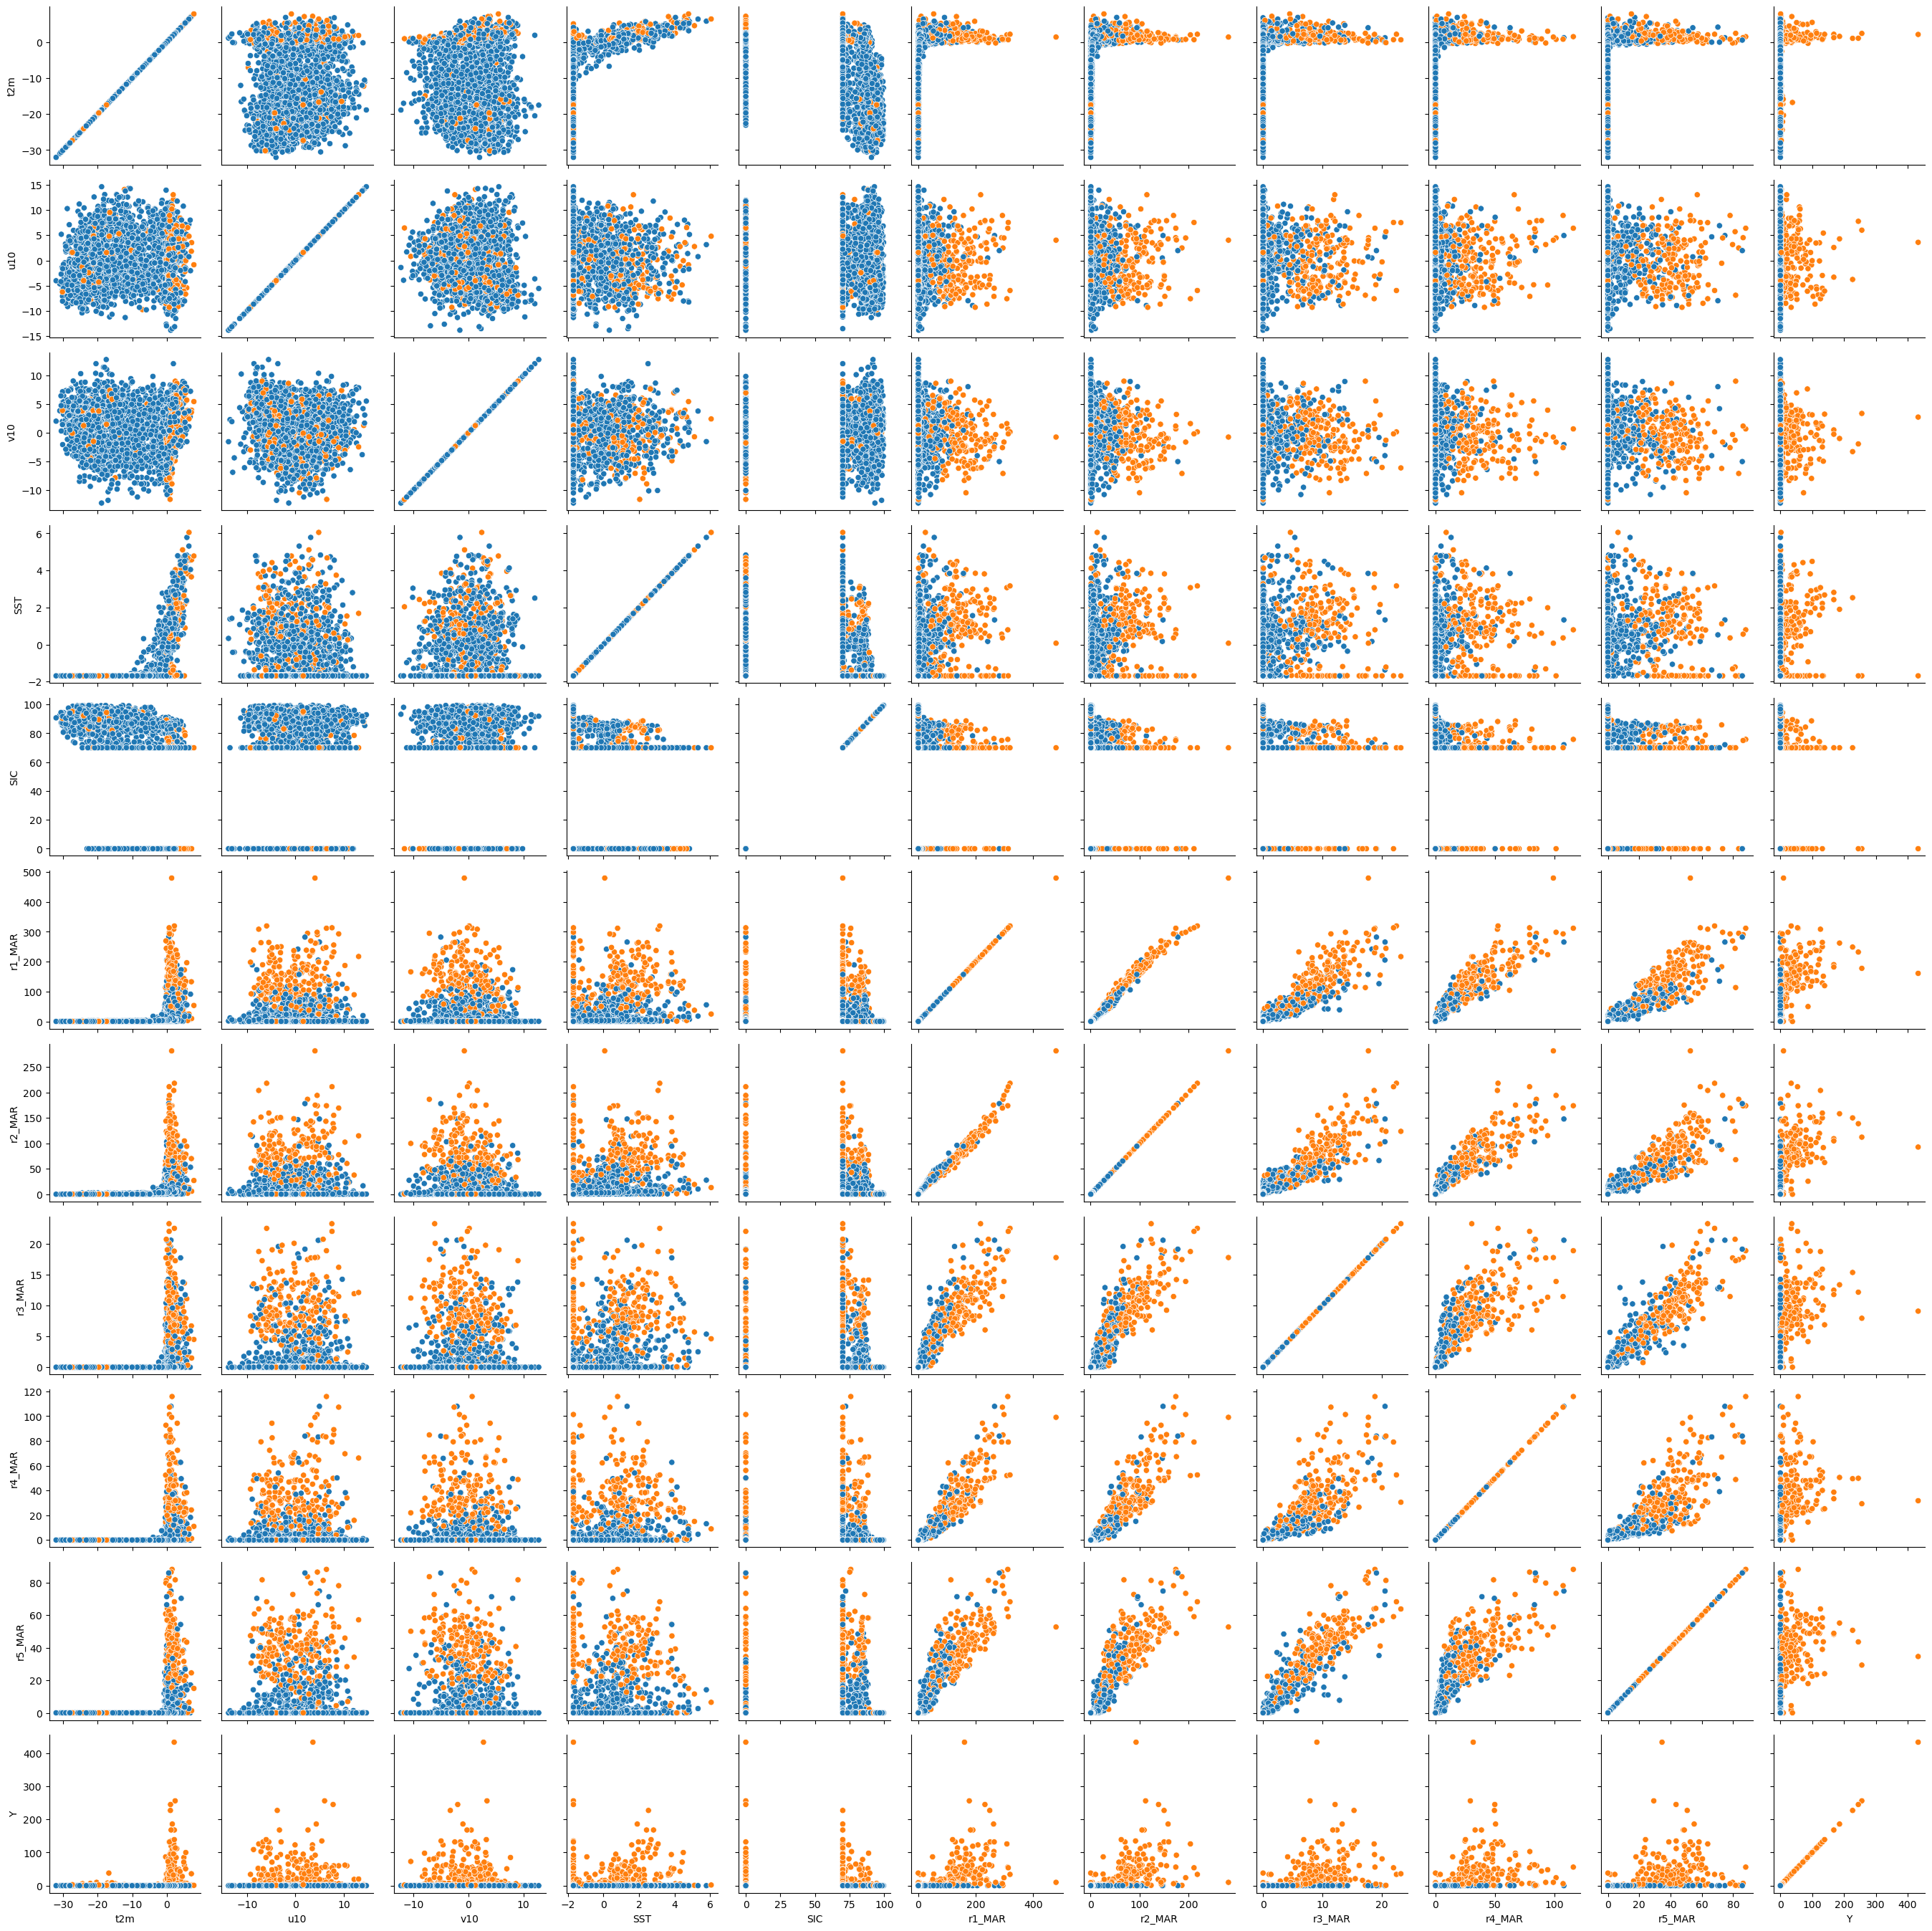

In [16]:
g=sns.PairGrid(tab,hue="classe") # on veut voire les comportement des données selons la caribles classe
g.map(sns.scatterplot)
plt.show()

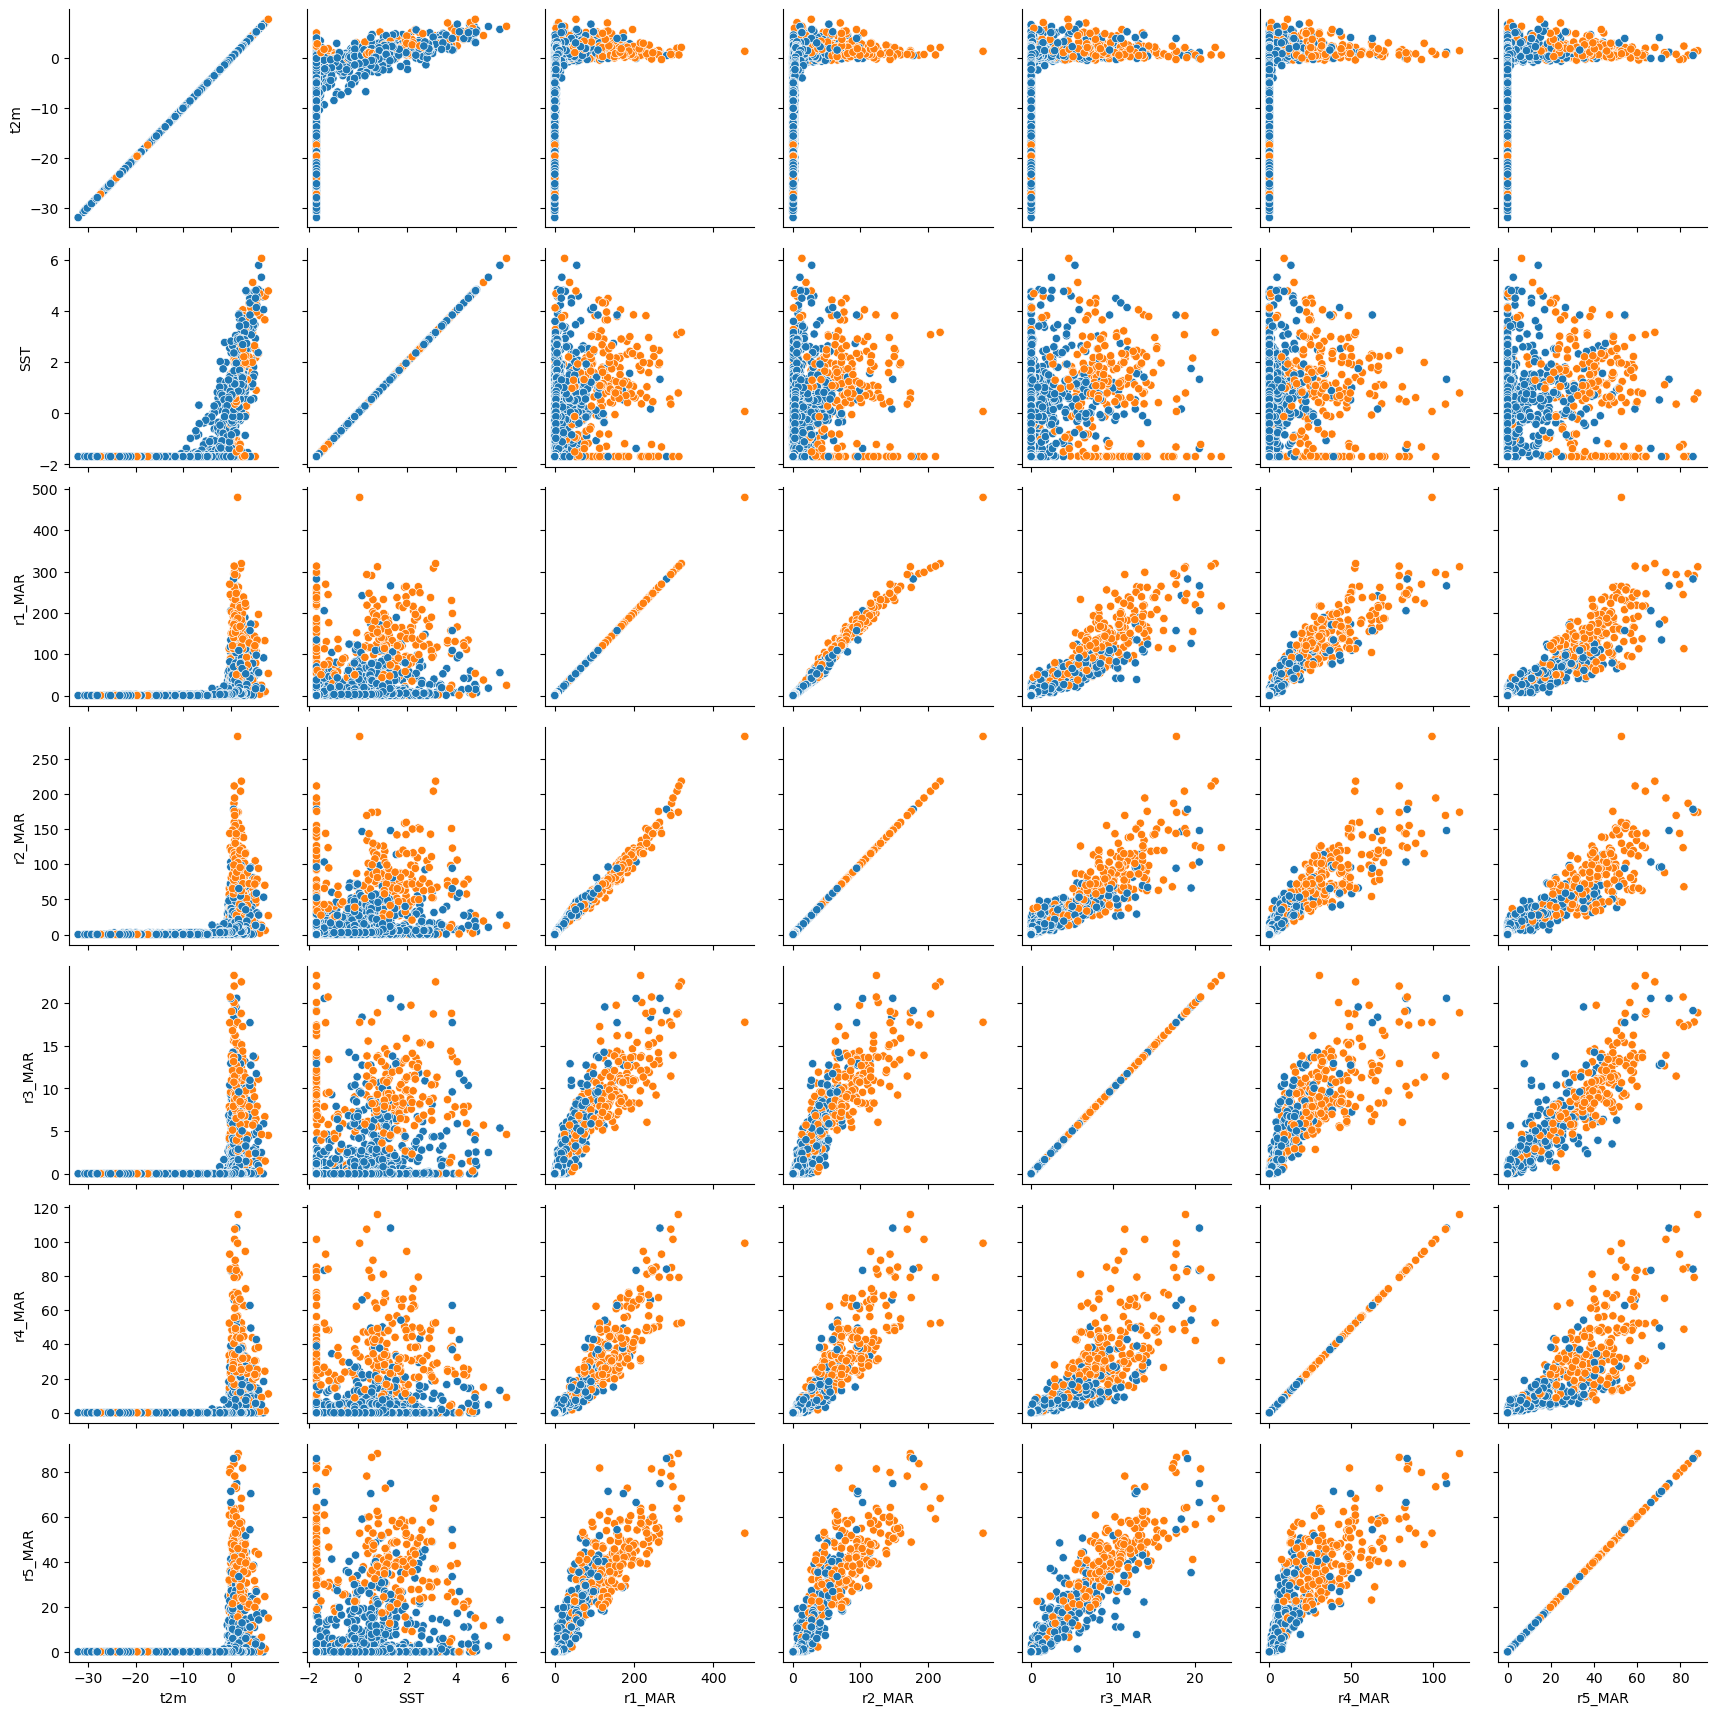

In [17]:
g=sns.PairGrid(tab[["t2m","SST","r1_MAR","r2_MAR","r3_MAR","r4_MAR","r5_MAR","classe"]],hue="classe")
g.map(sns.scatterplot)
plt.show()

In [18]:
tab.corr(method="kendall" , numeric_only=True) #etude de correlation avec la methode Kendall

t2m       u10       v10       SST       SIC    r1_MAR    r2_MAR  \
t2m     1.000000  0.051042 -0.067589  0.587635 -0.437949  0.520535  0.517364   
u10     0.051042  1.000000 -0.058082  0.004373 -0.013441  0.011248  0.009599   
v10    -0.067589 -0.058082  1.000000 -0.072826  0.057532 -0.075487 -0.075210   
SST     0.587635  0.004373 -0.072826  1.000000 -0.397052  0.443448  0.441723   
SIC    -0.437949 -0.013441  0.057532 -0.397052  1.000000 -0.353105 -0.351502   
r1_MAR  0.520535  0.011248 -0.075487  0.443448 -0.353105  1.000000  0.988207   
r2_MAR  0.517364  0.009599 -0.075210  0.441723 -0.351502  0.988207  1.000000   
r3_MAR  0.566976 -0.001274 -0.077724  0.545353 -0.348489  0.650358  0.646105   
r4_MAR  0.577506 -0.005117 -0.080019  0.547746 -0.353458  0.670316  0.665720   
r5_MAR  0.548905  0.004344 -0.067625  0.533570 -0.346175  0.648149  0.644706   
Y       0.260304 -0.018497 -0.041338  0.225924 -0.159609  0.327520  0.324163   
classe  0.260891 -0.018552 -0.037973  0.224735 -0.155693  0.321188  0.317862   

          r3_MAR    r4_MAR    r5_MAR         Y    classe  
t2m     0.566976  0.577506  0.548905  0.260304  0.260891  
u10    -0.001274 -0.005117  0.004344 -0.018497 -0.018552  
v10    -0.077724 -0.080019 -0.067625 -0.041338 -0.037973  
SST     0.545353  0.547746  0.533570  0.225924  0.224735  
SIC    -0.348489 -0.353458 -0.346175 -0.159609 -0.155693  
r1_MAR  0.650358  0.670316  0.648149  0.327520  0.321188  
r2_MAR  0.646105  0.665720  0.644706  0.324163  0.317862  
r3_MAR  1.000000  0.920439  0.908065  0.475920  0.471160  
r4_MAR  0.920439  1.000000  0.914936  0.470053  0.464636  
r5_MAR  0.908065  0.914936  1.000000  0.456590  0.453475  
Y       0.475920  0.470053  0.456590  1.000000  0.970831  
classe  0.471160  0.464636  0.453475  0.970831  1.000000

In [19]:
tab.corr(method="pearson",numeric_only=True) #etude de correlation avec la methode pearson

t2m       u10       v10       SST       SIC    r1_MAR    r2_MAR  \
t2m     1.000000  0.075862 -0.131807  0.657489 -0.454902  0.437481  0.451639   
u10     0.075862  1.000000 -0.075057 -0.017954 -0.006444  0.003411  0.003858   
v10    -0.131807 -0.075057  1.000000 -0.057318  0.059363 -0.101444 -0.102442   
SST     0.657489 -0.017954 -0.057318  1.000000 -0.406368  0.426257  0.435023   
SIC    -0.454902 -0.006444  0.059363 -0.406368  1.000000 -0.158131 -0.167804   
r1_MAR  0.437481  0.003411 -0.101444  0.426257 -0.158131  1.000000  0.994459   
r2_MAR  0.451639  0.003858 -0.102442  0.435023 -0.167804  0.994459  1.000000   
r3_MAR  0.444990  0.007325 -0.099704  0.444378 -0.141125  0.935806  0.929419   
r4_MAR  0.381854  0.011761 -0.085138  0.367575 -0.133041  0.945813  0.928130   
r5_MAR  0.436673  0.002170 -0.108167  0.411861 -0.121010  0.935761  0.926574   
Y       0.206876 -0.007575 -0.061570  0.218057 -0.119269  0.599213  0.591531   
classe  0.280295 -0.021097 -0.045298  0.305585 -0.090045  0.673534  0.648399   

          r3_MAR    r4_MAR    r5_MAR         Y    classe  
t2m     0.444990  0.381854  0.436673  0.206876  0.280295  
u10     0.007325  0.011761  0.002170 -0.007575 -0.021097  
v10    -0.099704 -0.085138 -0.108167 -0.061570 -0.045298  
SST     0.444378  0.367575  0.411861  0.218057  0.305585  
SIC    -0.141125 -0.133041 -0.121010 -0.119269 -0.090045  
r1_MAR  0.935806  0.945813  0.935761  0.599213  0.673534  
r2_MAR  0.929419  0.928130  0.926574  0.591531  0.648399  
r3_MAR  1.000000  0.882928  0.948131  0.511553  0.637832  
r4_MAR  0.882928  1.000000  0.892465  0.518987  0.644297  
r5_MAR  0.948131  0.892465  1.000000  0.501149  0.661792  
Y       0.511553  0.518987  0.501149  1.000000  0.515383  
classe  0.637832  0.644297  0.661792  0.515383  1.000000

# Separation des données d'entrainements et d'évaluatons

In [42]:
X=tab[["t2m","SST","r1_MAR","r2_MAR","r3_MAR","r4_MAR","r5_MAR",]] #chois des variables de prediction
Y=tab["classe"]
Y=Y.values.reshape(2556,1)# redimmension pour avoir deux diemmension 
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
y_train, y_test=y_train.ravel(), y_test.ravel() # correction sur les dimmenssion

# Les modèles choisies pour l'etudes

In [45]:
names = [
    "Nearest Neighbors",
    "Naive Bayes",
    "QDA",
    "lda",
    "logreg",
    "arbredecision",
    "BaggingClassifier",
    "SVM",
]

classifiers = [
    KNeighborsClassifier(5),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    LinearDiscriminantAnalysis(),
    LogisticRegression(C=1e5),
    DecisionTreeClassifier(),
    BaggingClassifier(estimator=treemod,n_estimators=10,random_state=0),
    SVC(kernel="rbf"),
]
# je met tous les modele de classification que je vais utilisé dans une liste nommée classifiers.

# Entrainemant des modèles

In [48]:
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols) #ce dataframe va recupérer pour chaque model  le nom du model la precision et l'erreure de classification.

for clf in classifiers: # ce boucle permet de parcourire la liste des modele  pour entrainer chaque model.
    clf.fit(X_train, y_train )# entrainement du modele sur les données d'entrainement
    name = clf.__class__.__name__

    print("="*30)
    print(name)

    print('****Results****')
    train_predictions = clf.predict(X_test) # evaluation du model sur les données d'evaluation
    acc = accuracy_score(y_test, train_predictions) # recupère le score de l'evaluation.
    print("Accuracy: {:.4%}".format(acc))

print("="*30)

KNeighborsClassifier
****Results****
Accuracy: 94.7266%
GaussianNB
****Results****
Accuracy: 94.3359%
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 91.9922%
LinearDiscriminantAnalysis
****Results****
Accuracy: 95.1172%
LogisticRegression
****Results****
Accuracy: 94.1406%
DecisionTreeClassifier
****Results****
Accuracy: 90.8203%
BaggingClassifier
****Results****
Accuracy: 93.5547%
SVC
****Results****
Accuracy: 94.7266%


# Optimisation des hypers-parametre des modèles

In [51]:
# Définition du modèle
log_reg = LogisticRegression(solver='liblinear')  # 'liblinear' est recommandé pour des petits ensembles de données; on a moins de 3000 donnés

# Définition des hyperparamètres à optimiser
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Paramètre de régularisation
    'penalty': ['l1', 'l2'],  # Type de régularisation
    'solver': ['liblinear'],  # Solveur à utiliser
    'max_iter': [100, 200, 300]  # Nombre maximal d'itérations
}

# Configuration de GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid,
                           scoring='accuracy', cv=5, n_jobs=-1)

# Exécution de la recherche
grid_search.fit(X_train, y_train)

# Affichage des meilleurs hyperparamètres
print("Meilleurs hyperparamètres : ", grid_search.best_params_)

# Prédiction sur l'ensemble de test
y_pred = grid_search.predict(X_test)

# Évaluation du modèle
print("Précision : ", accuracy_score(y_test, y_pred))
print("Matrice de confusion:\n", confusion_matrix(y_test, y_pred))

Meilleurs hyperparamètres :  {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Précision :  0.943359375
Matrice de confusion:
 [[437   9]
 [ 20  46]]


In [52]:
# Définition du classificateur SVM avec noyau RBF
svm = SVC(kernel="rbf")
# Définition de la grille de paramètres à optimiser
p_grid = {"C": [1, 10, 100], "gamma": [0.01, 0.1]}
# Configuration de GridSearchCV
grid_search = GridSearchCV(estimator=svm, param_grid=p_grid,
                           scoring='accuracy', cv=5, n_jobs=-1)

# Exécution de la recherche
grid_search.fit(X_train, y_train)

# Affichage des meilleurs hyperparamètres
print("Meilleurs hyperparamètres : ", grid_search.best_params_)

# Prédiction sur l'ensemble de test
y_pred = grid_search.predict(X_test)

# Évaluation du modèle
print("Précision : ", accuracy_score(y_test, y_pred))
print("Matrice de confusion:\n",confusion_matrix(y_test, y_pred))

Meilleurs hyperparamètres :  {'C': 1, 'gamma': 0.01}
Précision :  0.9453125
Matrice de confusion:
 [[437   9]
 [ 19  47]]


In [53]:
# Définition du classificateur KNeighborsClassifier
knn = KNeighborsClassifier()

# Définition de la grille de paramètres à optimiser
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Nombre de voisins à considérer
    'weights': ['uniform', 'distance'],  # Méthode de pondération
    'metric': ['euclidean', 'manhattan', 'chebyshev'],  # Distance à utiliser
}

# Configuration de GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, 
                           scoring='accuracy', cv=5, 
                           verbose=1, n_jobs=-1)

# Exécution de la recherche sur la grille
grid_search.fit(X_train, y_train)

# Meilleurs paramètres trouvés
print("Meilleurs paramètres:", grid_search.best_params_)

# Évaluation du modèle sur l'ensemble de test
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

# Rapport de classification et matrice de confusion
print("Précision : ", accuracy_score(y_test, y_pred))
print("Matrice de confusion:\n",confusion_matrix(y_test, y_pred))



Fitting 5 folds for each of 30 candidates, totalling 150 fits
Meilleurs paramètres: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
Précision :  0.9453125
Matrice de confusion:
 [[437   9]
 [ 19  47]]


In [54]:
lda = LinearDiscriminantAnalysis()

# Définir la grille de paramètres à explorer
param_grid = {
    'solver': ['svd', 'lsqr', 'eigen'],
    'shrinkage': [None, 'auto'] if 'solver' in ['lsqr', 'eigen'] else [None],
    'tol': [1e-4, 1e-3, 1e-2]
}

# Configurer GridSearchCV
grid_search = GridSearchCV(estimator=lda, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=1)

# Ajuster GridSearchCV sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres et le meilleur score
print("Meilleurs paramètres:", grid_search.best_params_)
print("Meilleur score:", grid_search.best_score_)

# Prédire sur l'ensemble de test
best_lda = grid_search.best_estimator_
y_pred = best_lda.predict(X_test)

# Afficher les résultats
print("Matrice de confusion:\n", confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Meilleurs paramètres: {'shrinkage': None, 'solver': 'svd', 'tol': 0.0001}
Meilleur score: 0.9442291097368042
Matrice de confusion:
 [[436  10]
 [ 15  51]]


In [55]:
# Définir le modèle
gnb = GaussianNB()

# Définir les paramètres à optimiser
param_grid = {
    'var_smoothing': np.logspace(0, -9, num=100)  # Ajustement de var_smoothing
}
# Initialiser GridSearchCV
grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Ajuster le modèle
grid_search.fit(X_train, y_train)

# Meilleurs paramètres trouvés
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Évaluation du modèle sur l'ensemble de test
y_pred = best_estimator.predict(X_test)

# Affichage des résultats
print("Meilleurs paramètres :", best_params)
print("Précision sur le jeu de test : ", accuracy_score(y_test, y_pred))
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred))

Meilleurs paramètres : {'var_smoothing': 0.2848035868435802}
Précision sur le jeu de test :  0.939453125
Matrice de confusion :
 [[437   9]
 [ 22  44]]
